# CarDekho Price Prediction

In [3]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
# Import the dataset
df = pd.read_csv('Cardekho-raw-dataset.csv')
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
# Check the concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [7]:
# Check the shape of the dataset
df.shape

(15411, 13)

In [8]:
# Check statistics of numerical columns
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [9]:
# Check unique values of the 'brand' column
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [10]:
# Check value counts of the 'brand' column
df['brand'].value_counts()

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

In [11]:
# Check value counts of the 'car_name' column
df['car_name'].value_counts()

car_name
Hyundai i20              906
Maruti Swift Dzire       890
Maruti Swift             781
Maruti Alto              778
Honda City               757
                        ... 
Mercedes-AMG C             1
Rolls-Royce Ghost          1
Maserati Quattroporte      1
Isuzu MUX                  1
Force Gurkha               1
Name: count, Length: 121, dtype: int64

In [12]:
# Normalize the fuel_type based on it's value_counts
df['fuel_type'].value_counts(normalize=True)*100

fuel_type
Petrol      49.594446
Diesel      48.140938
CNG          1.953150
LPG          0.285510
Electric     0.025955
Name: proportion, dtype: float64

In [13]:
# Check the mean of the mileage column
round(float(df['mileage'].mean()),2)

19.7

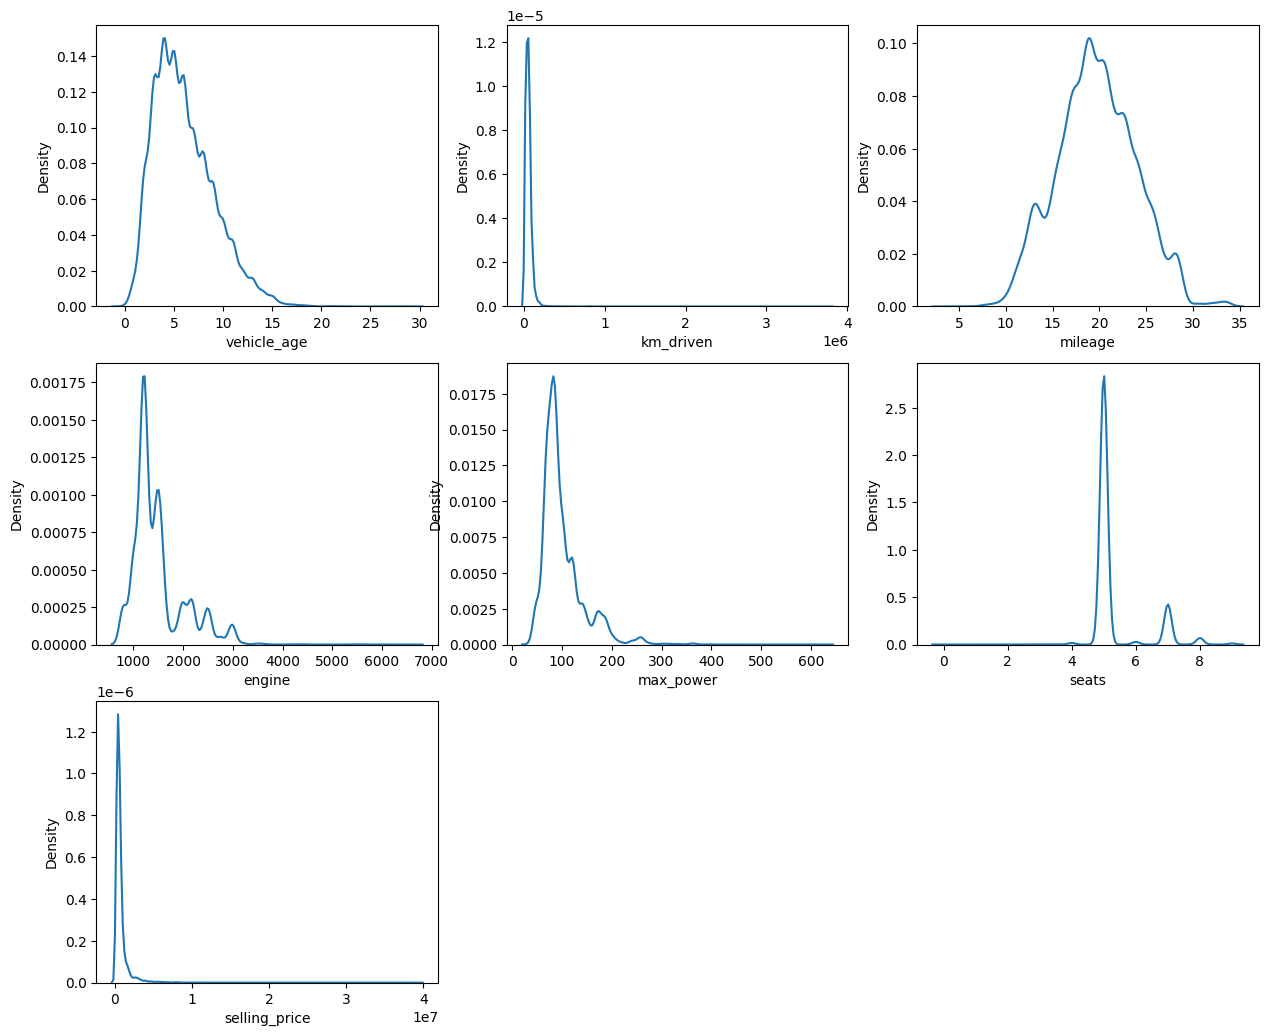

In [14]:
# Plot the density graphs of each of the numerical columns
num_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats','selling_price']
plt.figure(figsize=(15, 30))
for i in range(len(num_columns)):
    plt.subplot(7, 3, i+1) 
    sns.kdeplot(data = df[num_columns[i]])

plt.show()

**Overall Insights**

1️⃣ Right-Skewed Variables:

Variables like km_driven, selling_price, and max_power exhibit strong right skewness, meaning most values are clustered at the lower end, with a few high-value outliers.

To improve model performance, applying log or square root transformations may help normalize these distributions.


2️⃣ Concentrated Distributions:

Features like seats and vehicle_age are highly concentrated around common values (e.g., 5 seats, vehicle age between 0-10 years).

This suggests a preference for newer vehicles and standard mid-sized cars, aligning with general market trends.


3️⃣Diverse Vehicle Segments:

The multimodal distribution of engine size and the wide range of max_power indicate the dataset includes multiple vehicle categories (e.g., compact cars, SUVs, performance vehicles).

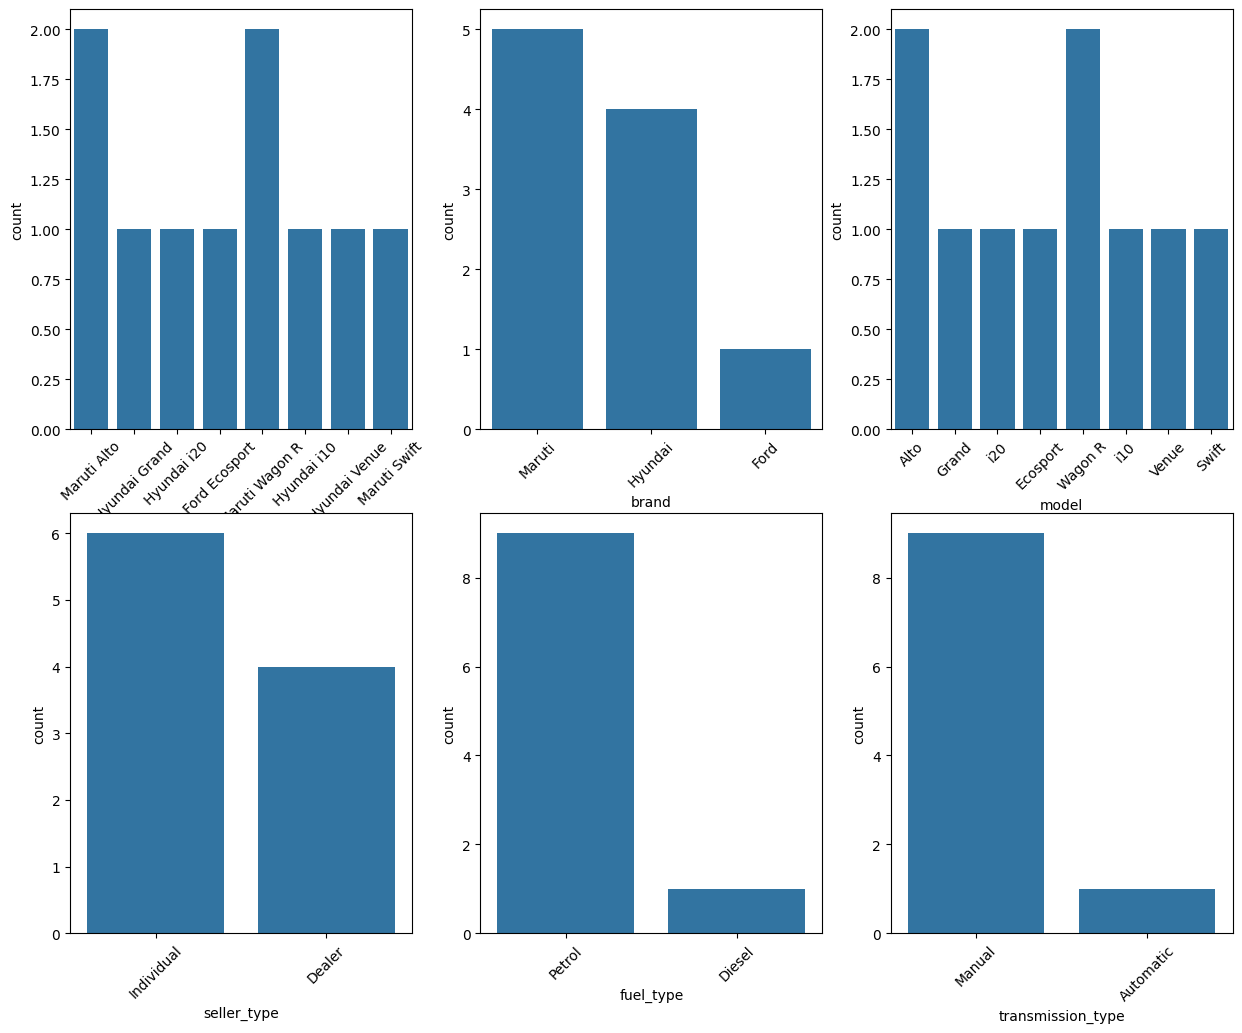

In [15]:
# Plot the countplots of each of the categorical columns
cat_columns = ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
plt.figure(figsize=(15, 12))
for i in range(len(cat_columns)):
    plt.subplot(2, 3, i+1)
    plt.xticks(rotation = 45)
    sns.countplot(x = df[cat_columns[i]].head(10))

plt.show()

**Insights**

- The dataset skews toward manual transmission and petrol-fueled cars sold by individuals.

- Maruti is the dominant brand, with the Maruti Alto and Hyundai Grand leading among models.

- Diesel cars and automatic transmissions are underrepresented, potentially indicating limited availability or demand in the dataset.

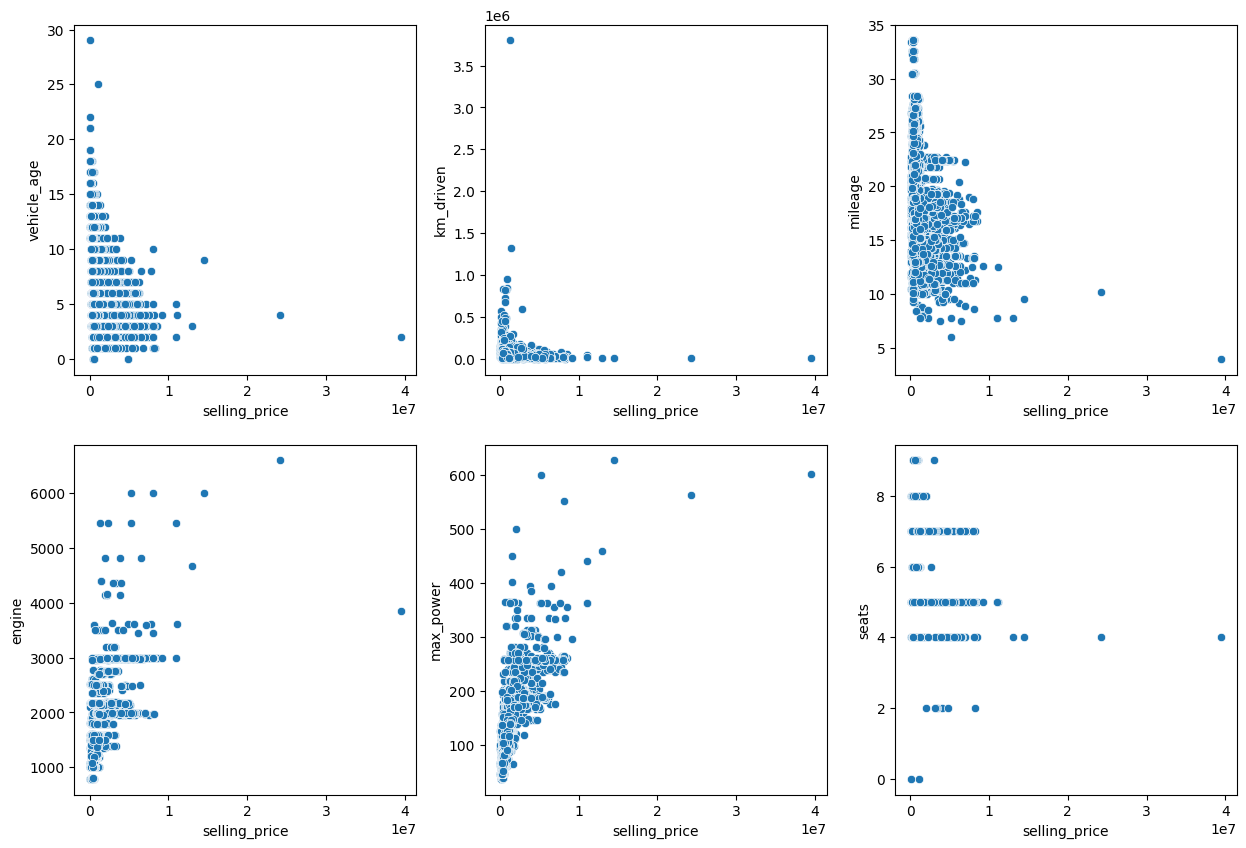

In [16]:
# Plot the relationship of each variable with the selling price (Target variable)
numerical_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

plt.figure(figsize=(15, 10))
for i in range(len(numerical_columns)):
    plt.subplot(2, 3, i+1) 
    sns.scatterplot(data = df, x = 'selling_price', y = numerical_columns[i])

plt.show()

**Interpretation of Scatterplots**

1️⃣ Vehicle Age vs. Selling Price

Observation: Older vehicles generally have lower selling prices, showing an inverse relationship between age and price.

Outliers: Some older vehicles are priced unusually high, possibly due to factors like brand value, limited edition models, or modifications.


2️⃣ Kilometers Driven vs. Selling Price

Observation: Cars with lower mileage tend to be priced higher, while those with higher mileage are concentrated at lower prices.

Clusters: A distinct cluster of low-priced, low-mileage vehicles suggests a segment of budget-friendly, lightly used cars.


3️⃣ Mileage vs. Selling Price

Observation: No strong correlation is observed, though cars with lower mileage tend to be priced around the average selling price.

Possible Explanation: Other factors (e.g., brand, condition, model year) might have a stronger influence on price than mileage alone.


4️⃣ Engine Size vs. Selling Price

Observation: A positive correlation is evident—vehicles with larger engine capacities tend to have higher prices.

Implication: Buyers likely associate larger engines with better performance, influencing pricing trends.


5️⃣ Max Power vs. Selling Price

Observation: A clear positive trend—higher power output is generally associated with higher prices.

Outliers: Some extreme cases exist where vehicles with very high power levels have significantly higher prices, possibly due to performance or luxury branding.


6️⃣ Seats vs. Selling Price

Observation: No clear relationship between seating capacity and selling price.

Market Trend: Most cars have 4 or 5 seats, and pricing appears to be influenced more by other factors like brand, model, and features rather than the number of seats.

In [17]:
# Multi-variate analysis - to check the correlation between all the combination of numerical features
num_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats','selling_price']
df[num_columns].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


<Axes: >

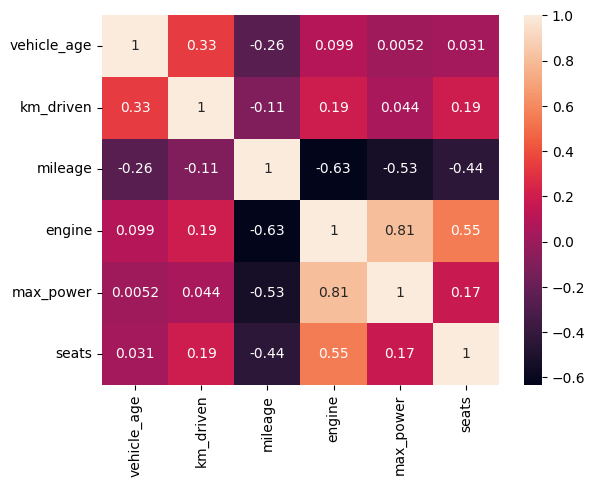

In [18]:
# Plot the heatmap of the correlation between each of the numerical features
sns.heatmap(data = df[numerical_columns].corr(), annot=True)

**Insights**

**The Strongest Relationships:**
 - Engine vs. Max Power (0.81): Strongly linked, as expected for vehicle specifications.
 - Engine vs. Mileage (-0.63): Indicates a trade-off between performance (engine size) and efficiency (mileage).

**The Weakest Relationships:**
 - Vehicle Age vs. Max Power (0.0052): No notable effect of age on power.
 - Km Driven vs. Max Power (0.044): Distance traveled doesn't significantly impact the power of the vehicle.

In [19]:
# Create a copy of the dataframe to model the data
model_data = df.copy()
model_data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [20]:
# Drop the noise in the data (unwanted columns)
model_data.drop(labels=['car_name', 'brand', 'model', 'seller_type'], axis=1, inplace=True)

In [21]:
model_data.head()

,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000


In [22]:
# Convert the categorical variables into a set of binary(0,1) 
model_data = pd.get_dummies(model_data, dtype = int)
model_data.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,550000,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,215000,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,226000,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,570000,0,1,0,0,0,0,1


In [23]:
# Drop the column of selling_price from the independent variable
X = model_data.drop('selling_price', axis=1)
X.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,0,1,0,0,0,0,1


In [24]:
# For getting the target variable we will just have selling_price
Y = model_data['selling_price']
Y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

In [25]:
# Divide data into Train & Test data
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.2)
train_X
# 80% data goes to Train & 20% goes to Test

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
4040,9,75000,15.96,2523,62.10,7,0,1,0,0,0,0,1
649,7,40000,19.10,1197,85.80,5,0,0,0,0,1,0,1
2316,4,73630,15.10,1196,73.00,5,1,0,0,0,0,0,1
2699,5,15000,19.44,1198,67.00,7,0,0,0,0,1,0,1
6662,11,65000,17.00,1497,118.00,5,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,5,115000,28.09,1248,88.50,5,0,1,0,0,0,0,1
11069,7,54159,18.50,1197,82.85,5,0,0,0,0,1,0,1
13658,7,65694,17.01,1591,121.30,5,0,0,0,0,1,0,1
10149,3,53546,18.90,1197,81.86,5,0,0,0,0,1,0,1


In [26]:
# Applying LinearRegression for training the model
Regressor = LinearRegression().fit(train_X,train_Y)
Regressor

LinearRegression()

In [27]:
# Getting the predictions
Prediction = Regressor.predict(test_X)
print(Prediction)
print(test_Y)

[ 690429.02141406 2104401.12138994 2133355.31455244 ... 1086941.02167037
  573854.55268878  -13602.35349857]
9893      585000
13421    2975000
1344     2700000
2135      529000
0         120000
          ...   
10430    3200000
12708     359000
4274      285000
7724      685000
14719     350000
Name: selling_price, Length: 3083, dtype: int64


In [28]:
test_X['predicted_sales_price'] = Prediction

test_X['actual_price'] = test_Y

# Calculate the difference between the predicted sales price and the actual price
test_X['difference'] = test_X['predicted_sales_price'] - test_X['actual_price']

# Display the predicted sales price, actual price and the difference
test_X[['predicted_sales_price', 'actual_price', 'difference']]

,predicted_sales_price,actual_price,difference
9893,6.904290e+05,585000,105429.021414
13421,2.104401e+06,2975000,-870598.878610
1344,2.133355e+06,2700000,-566644.685448
2135,6.548082e+05,529000,125808.198033
0,-4.238569e+05,120000,-543856.872975
...,...,...,...
10430,2.244592e+06,3200000,-955407.885372
12708,2.589464e+05,359000,-100053.636712
4274,1.086941e+06,285000,801941.021670
7724,5.738546e+05,685000,-111145.447311


In [29]:
# Calculate the root mean squared error for the prediction
mse = []
mse.append(mean_squared_error(y_true = test_Y, y_pred = Prediction))

rmse = []
rmse.append(np.sqrt(mse[0]))

print(f"The Root Mean Squared Error is : {rmse[0].round(2)}")

The Root Mean Squared Error is : 456212.83
